In [42]:
import os
import sys
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname('__file__'), '..')))

import pandas as pd
from cluster_dtw import *
import matplotlib.pyplot as plt
import json
import pickle

In [ ]:


TARGET = 'hospits'
assert TARGET in ['urgences', 'hospits']

AGE = 'children'
assert AGE in ['adults', 'children']

DATA_DIR = './datasets/'

SAVE_DIR = './result_clusters_56/' + TARGET + (f'_{AGE}' if TARGET == 'hospits' else '') + '/'

if TARGET == 'urgences':
    target_column = 'target_hospital_nb_emmergencies%J+3%mean_3J'
elif TARGET == 'hospits' and AGE == 'adults':
    target_column = 'target_hospital_nb_hospit_np_from_ED_adults%J+7%mean_7J'
elif TARGET == 'hospits' and AGE == 'children':
    target_column = 'target_hospital_nb_hospit_np_from_ED_children%J+7%mean_7J'


In [44]:
if SAVE_DIR != None:
    if not os.path.exists(SAVE_DIR):
        os.makedirs(SAVE_DIR, exist_ok=True)

In [45]:
print(os.listdir(DATA_DIR))

['full_dataset_GROUPEMENT HOSPITALIER DE HAUTE SAONE.csv', 'full_dataset_CH AUXERRE_targets_urgences.csv', 'full_dataset_HÔPITAL PRIVÉ DIJON BOURGOGNE.csv', 'full_dataset_CLINIQUE MÉDICO-CHIRURGICALE DE CHENOVE.csv', 'full_dataset_CH COSNE COURS SUR LOIRE_targets_hospits.csv', 'full_dataset_CH LOUIS JAILLON SAINT CLAUDE_targets_hospits.csv', 'full_dataset_POLYCLINIQUE STE MARGUERITE AUXERRE.csv', 'full_dataset_CH CHARTRES.csv', 'full_dataset_CH DECIZE.csv', 'full_dataset_CH J. COEUR BOURGES_targets_urgences.csv', 'full_dataset_CH VENDOME.csv', 'full_dataset_CH CHARTRES_targets_hospits.csv', 'full_dataset_CH JURA SUD_targets_urgences.csv', 'full_dataset_CH LA TOUR BLANCHE ISSOUDUN_targets_urgences.csv', 'full_dataset_CH VENDOME_targets_urgences.csv', "full_dataset_CH D'AVALLON.csv", 'full_dataset_CH VIERZON_targets_hospits.csv', 'full_dataset_CH DU TONNERROIS.csv', 'full_dataset_CH DU VAL DE SAÔNE GRAY_targets_urgences.csv', 'full_dataset_CH LE BLANC.csv', 'full_dataset_CH L PASTEUR

## Functions

In [46]:
def subplots_time_series(time_series, date_range, labels, value='Value', cluster='', save_dir=None):
    plt.figure(figsize=(15, 100))

    # Subplot for ts
    for i in range(len(labels)):
        plt.subplot(len(labels), 1, i+1)
        plt.plot(date_range, time_series[i], label=labels[i], linewidth=0.5)
        title = f'{labels[i]} {value}'
        plt.title(title)
        plt.grid(True)

    plt.tight_layout()
    if save_dir != None: plt.savefig(save_dir + f"subplots_{value}{cluster}.png", format="png", dpi=300)
    plt.show()

## Loading Data

In [47]:
datasets = []
etabs = []
for file in os.listdir(DATA_DIR):
    if file.endswith(TARGET + ".csv"):
        etabs.append(file.split("_")[2])
        df = pd.read_csv(os.path.join(DATA_DIR, file))
        df = df[['date', target_column]]
        df.set_index('date', inplace=True)
        # print(f'{etabs[-1]} : {df.shape}')
        datasets.append(df)

In [48]:
datasets[0]

,target_hospital_nb_hospit_np_from_ED_adults%J+7%mean_7J
date,
2019-01-07,10.0
2019-01-08,10.0
2019-01-09,10.0
2019-01-10,10.0
2019-01-11,10.0
...,...
2023-12-27,10.0
2023-12-28,10.0
2023-12-29,10.0


In [49]:
start_date = datasets[0].index.min()
end_date = datasets[0].index.max()
date_range = pd.date_range(start_date, end_date)

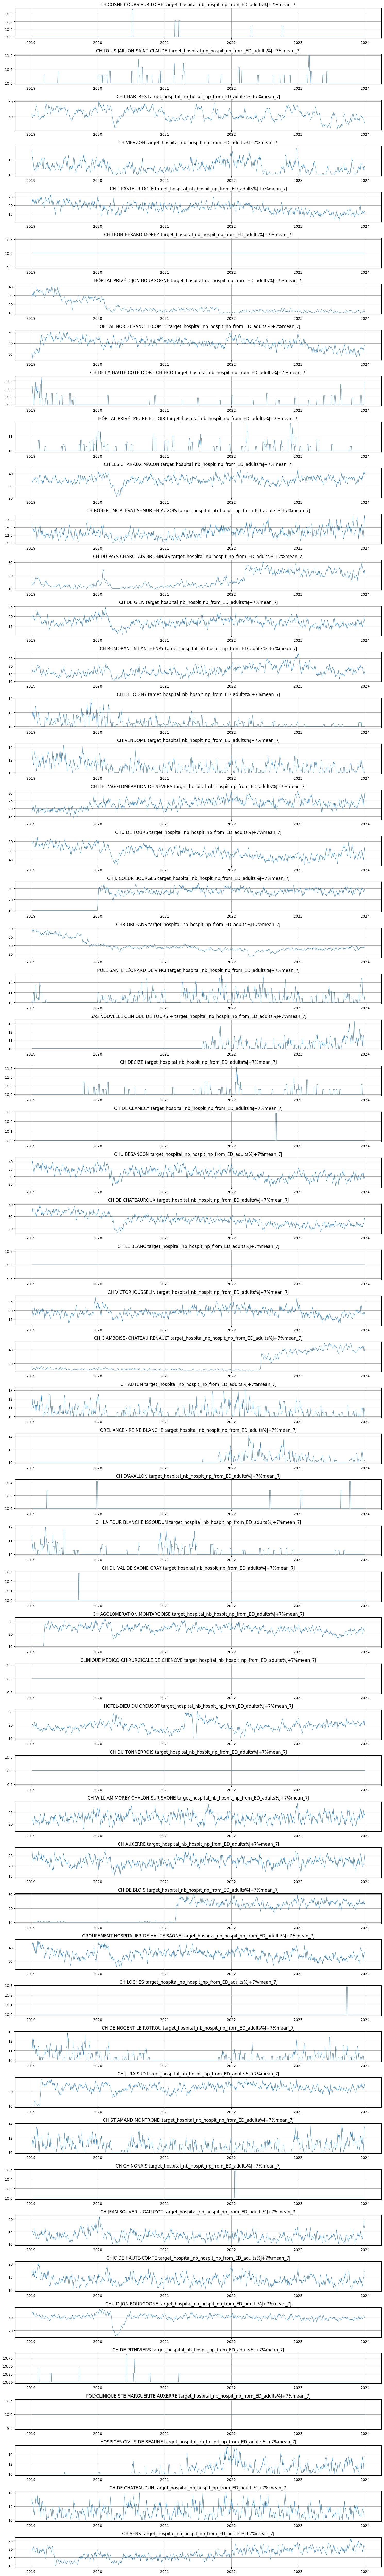

In [50]:
ts = []
for etab in etabs:
    ts.append(datasets[etabs.index(etab)][target_column])
subplots_time_series(ts, date_range, etabs, value=target_column, cluster='all', save_dir=SAVE_DIR)